In [144]:
import json
import seaborn as sns
import pandas as pd
from dataclasses import make_dataclass
import typing as t
from dacite import from_dict

# Load document and create dataframe

In [145]:
def load_document(path):
    with open(path, "r") as f:
        return json.load(f)
    
def load_kde_data_as_df(path):
    kde_data = load_document(path)
    Record = make_dataclass('Record', [('record_id', int),('index_type', str),('k', int), ('sigma', float), ('m', int), ('scale', str), ('accuracy', float)])
    data = []
    for i,it in enumerate(kde_data):
        record_id=i
        index_type=it['index_type']
        k=it['parameters']['k']
        s=it['parameters']['sigma']
        m=it['parameters']['m']
        for scale,acc in it['accuracy'].items():
            if scale in ('1m', '5m'):
                continue
            data.append(Record(record_id, index_type,k,s,m,scale,acc))
    return pd.DataFrame(data)
    
path = '/home/andrew/Documents/study/thesis/thesis-src/experiments/localisation_tuning/V1_1__kde_tuning_with_2_indices_val_dataset/tuning_results.json'
df=load_kde_data_as_df(path)
df

,record_id,index_type,k,sigma,m,scale,accuracy
0,0,cosine,10,0.0001,2,10m,0.028409
1,0,cosine,10,0.0001,2,100m,0.194056
2,0,cosine,10,0.0001,2,500m,0.340909
3,0,cosine,10,0.0001,2,1km,0.423514
4,0,cosine,10,0.0001,2,5km,0.644668
...,...,...,...,...,...,...,...
2555,511,L2,100,0.0100,10,10m,0.008741
2556,511,L2,100,0.0100,10,100m,0.145979
2557,511,L2,100,0.0100,10,500m,0.371066
2558,511,L2,100,0.0100,10,1km,0.471591


## KDE fiinetuining with L2 index

In [146]:
df_l2 = df[df['index_type']=='L2']

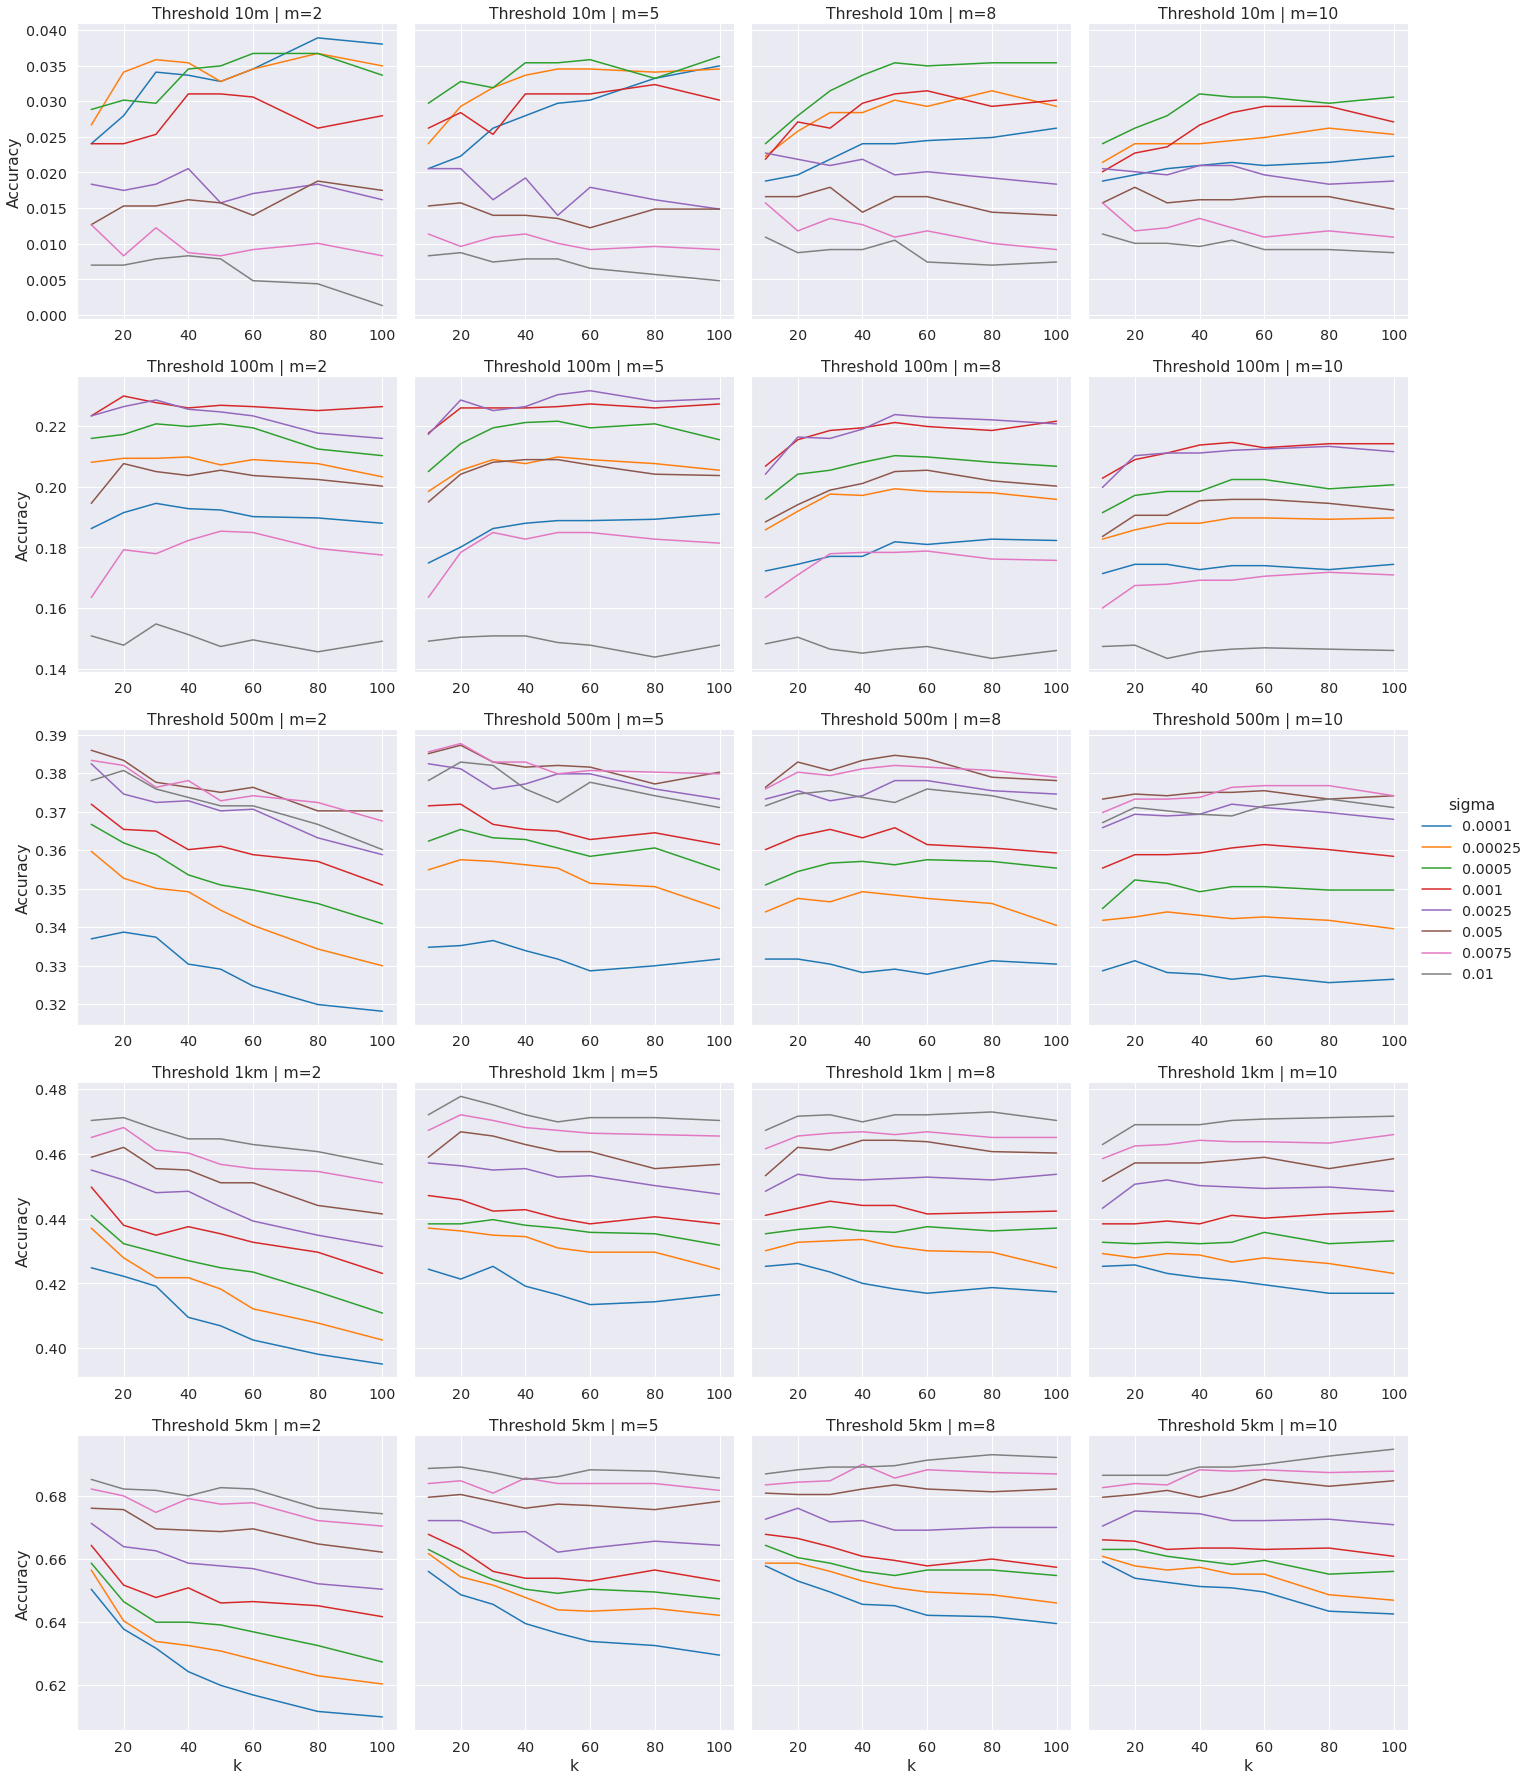

In [162]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
g= sns.relplot(
    data=df_l2,
    x='k', y='accuracy', col='m', row='scale', hue='sigma',
    kind='line', facet_kws={'sharey':'row', 'sharex':False},
    palette=sns.color_palette('tab10',8),
)

g.set_titles(row_template="Threshold {row_name}", col_template="m={col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_l2.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


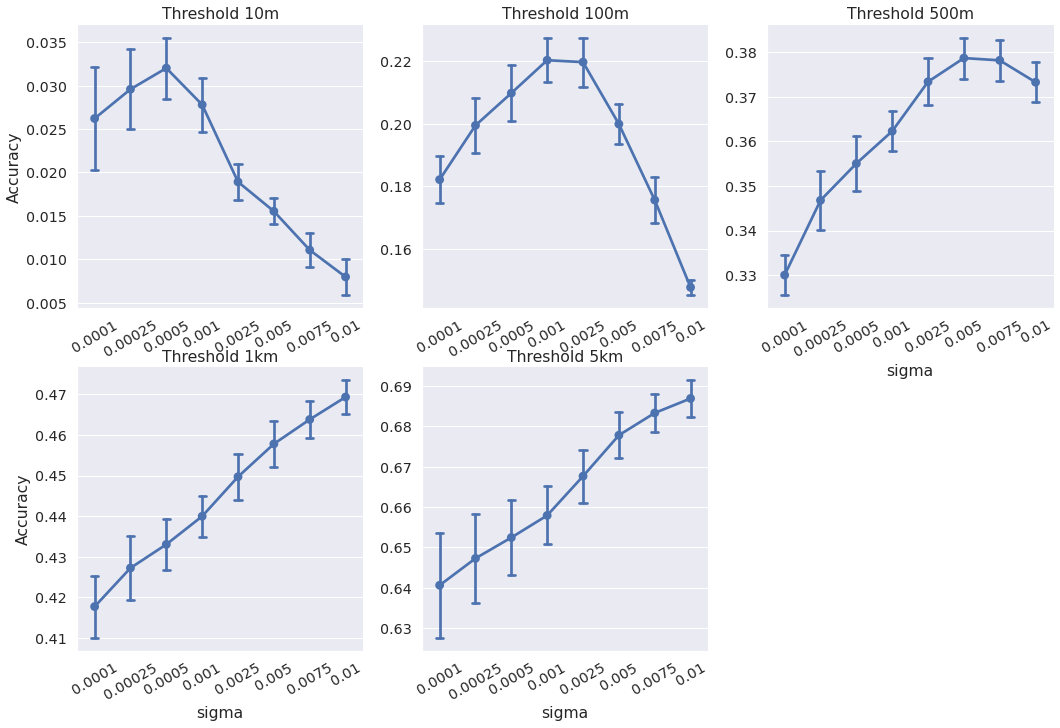

In [163]:
g=sns.catplot(data=df_l2, x='sigma', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci='sd', capsize=.2)
g.set_xticklabels(rotation=30, ha='center')
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_l2_sigma.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


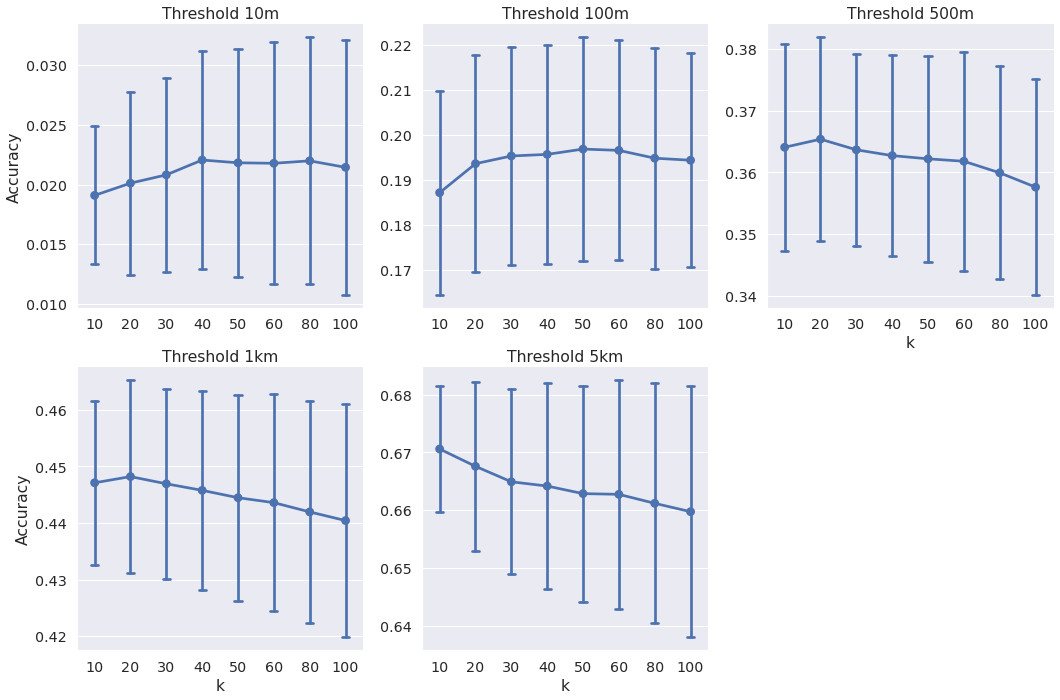

In [164]:
g=sns.catplot(data=df_l2, x='k', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci="sd", capsize=.2)
# g.set_xticklabels(rotation=30, ha='center')
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_l2_k.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


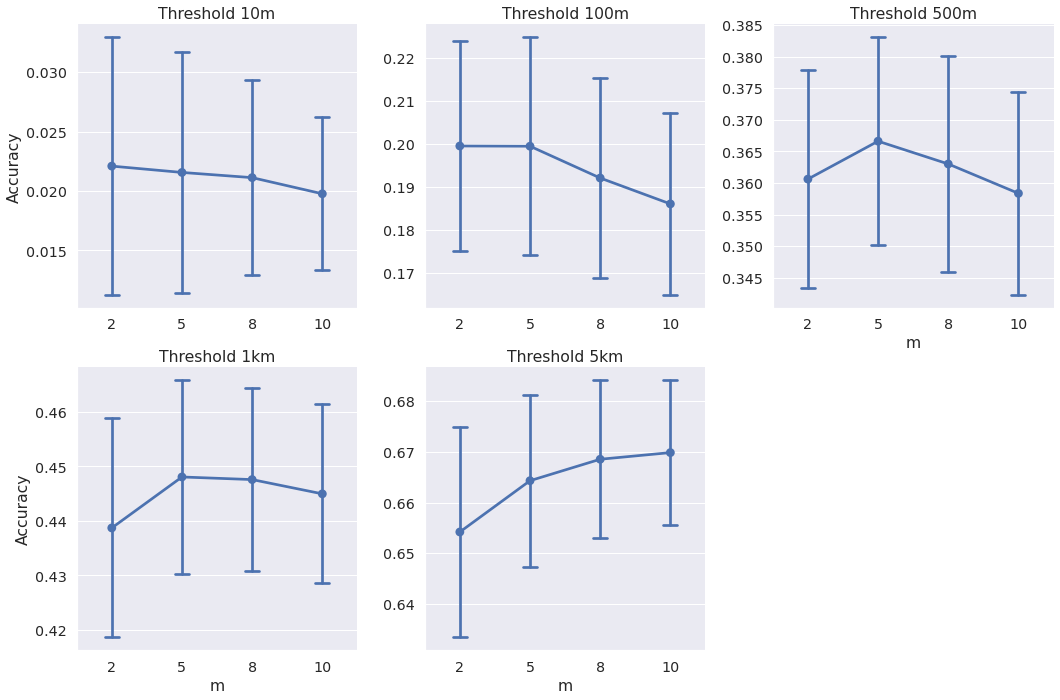

In [165]:
g=sns.catplot(data=df_l2, x='m', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci="sd", capsize=.2)
# g.set_xticklabels(rotation=30, ha='center')
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_l2_m.eps', format='eps',bbox_inches='tight')

In [133]:
max_accuracy = df_l2.groupby(['scale'])['accuracy'].transform(max) == df_l2['accuracy']
df_l2[max_accuracy]

,record_id,index_type,k,sigma,m,scale,accuracy
1567,313,L2,20,0.0075,5,500m,0.387675
1588,317,L2,20,0.0100,5,1km,0.477710
2166,433,L2,60,0.0025,5,100m,0.231643
2240,448,L2,80,0.0001,2,10m,0.038899
2559,511,L2,100,0.0100,10,5km,0.694930


# KDE fintuning with cosine index

In [153]:
df_cosine = df[df['index_type']=='cosine']

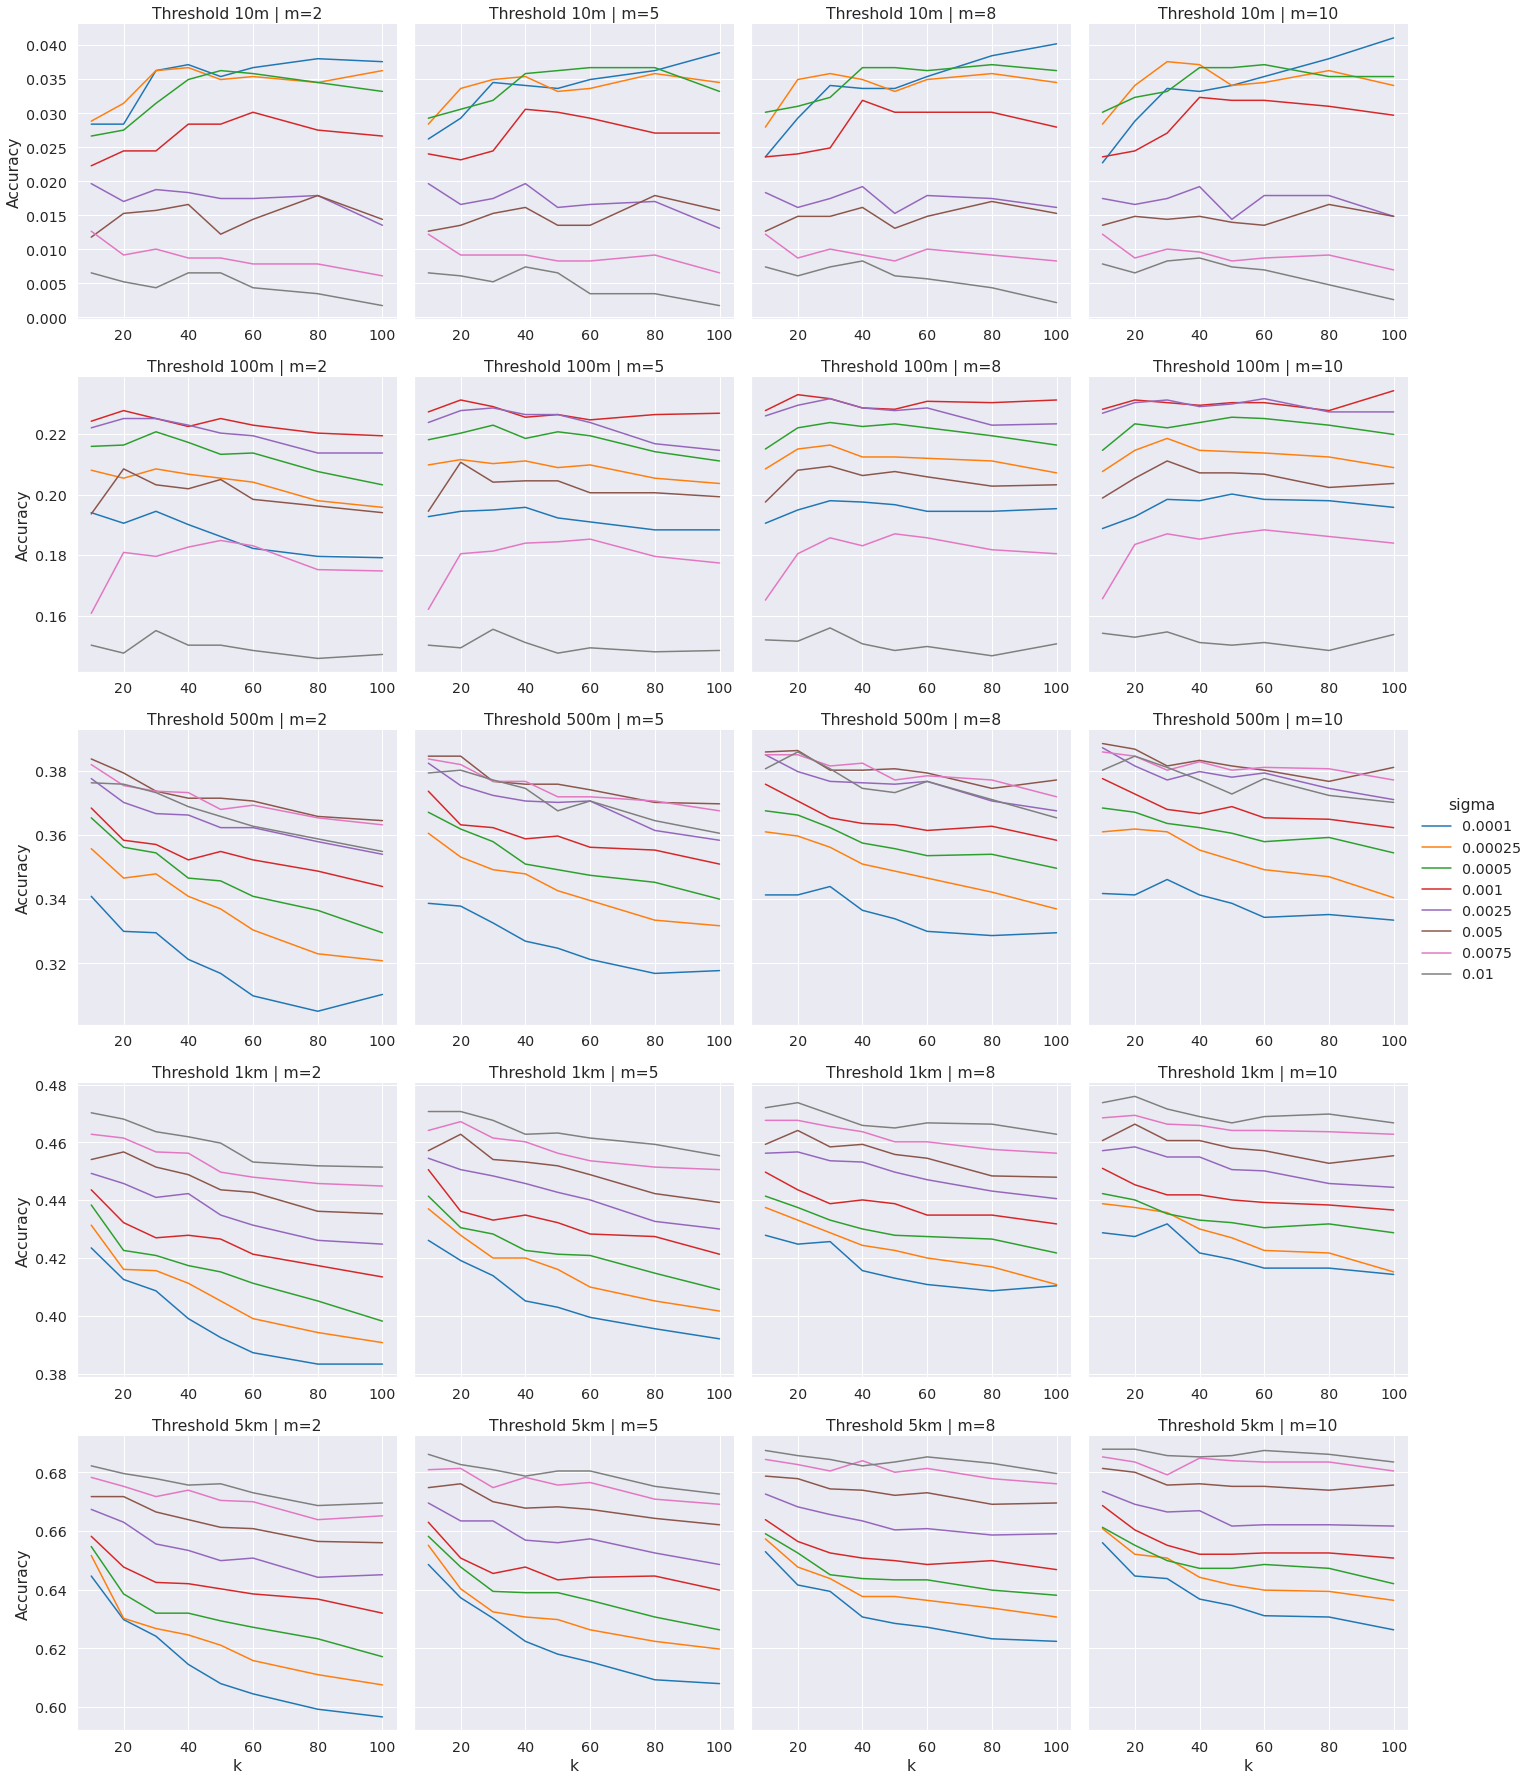

In [166]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
g= sns.relplot(
    data=df_cosine,
    x='k', y='accuracy', col='m', row='scale', hue='sigma',
    kind='line', facet_kws={'sharey':'row', 'sharex':False},
    palette=sns.color_palette('tab10',8),
)

g.set_titles(row_template="Threshold {row_name}", col_template="m={col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_cos.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


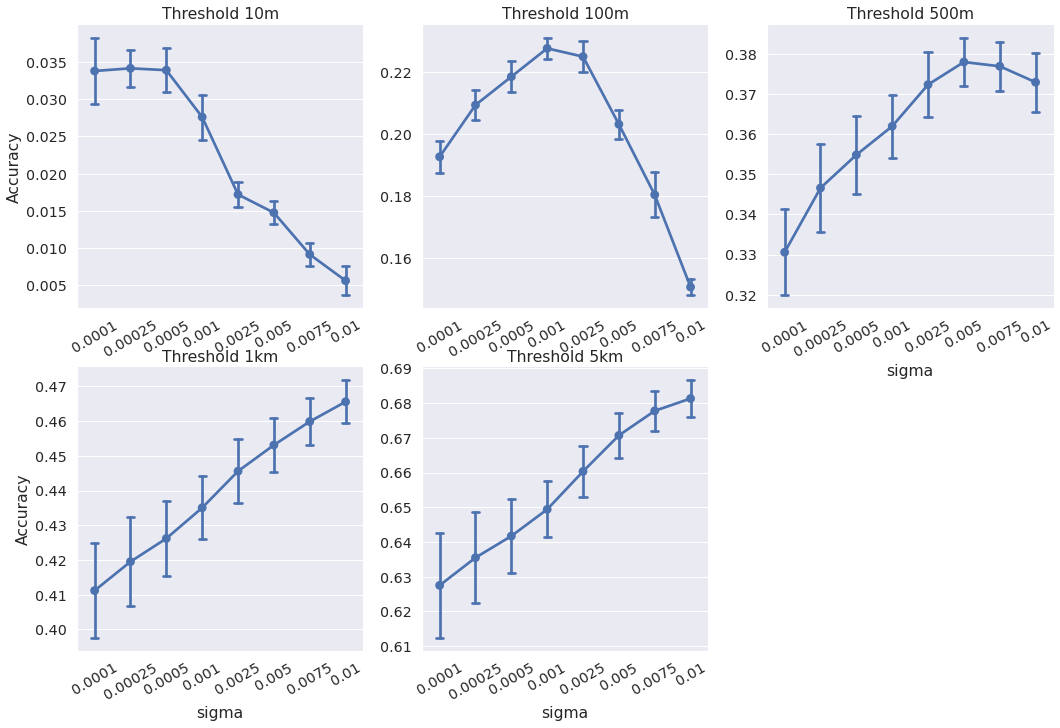

In [167]:
g=sns.catplot(data=df_cosine, x='sigma', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci='sd', capsize=.2)
g.set_xticklabels(rotation=30, ha='center')
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_cos_sigma.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


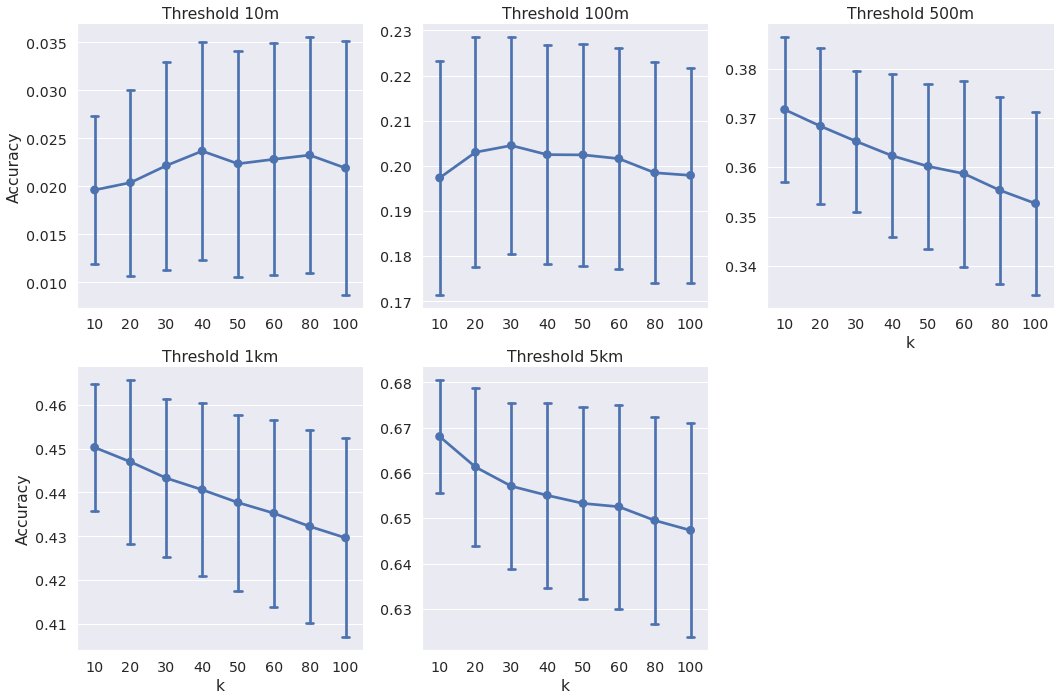

In [168]:
g=sns.catplot(data=df_cosine, x='k', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci="sd", capsize=.2)
# g.set_xticklabels(rotation=30, ha='center')
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_cos_k.eps', format='eps',bbox_inches='tight')

/home/andrew/Documents/study/thesis/thesis-src/.env/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


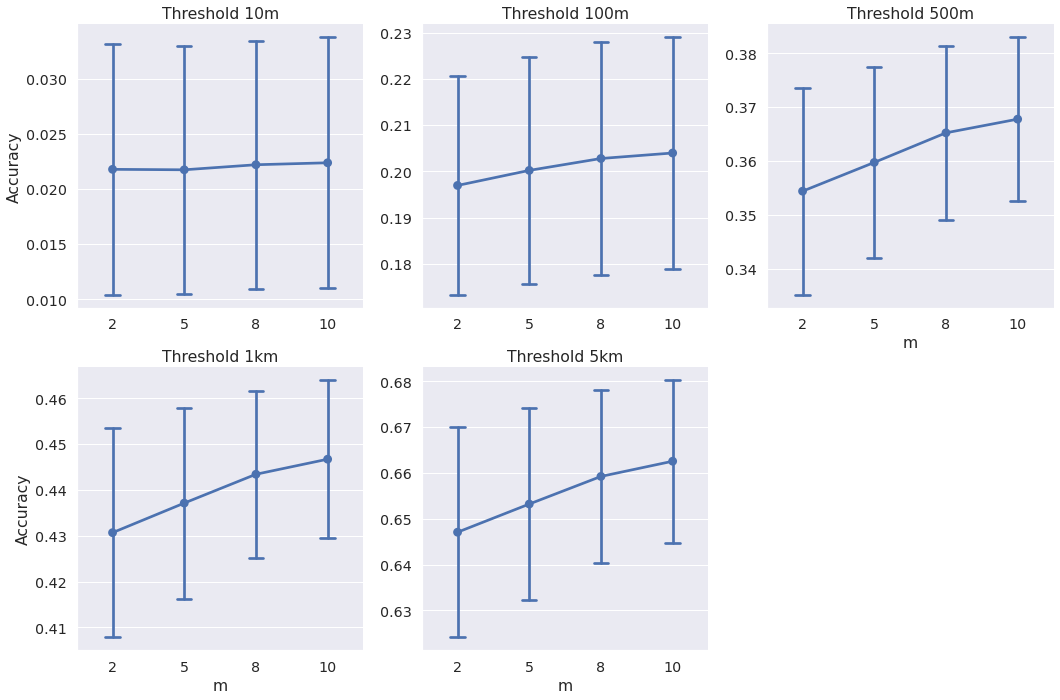

In [169]:
g=sns.catplot(data=df_cosine, x='m', y='accuracy', col='scale', col_wrap=3, sharey=False, sharex=False, kind='point', ci="sd", capsize=.2)
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_kde_cos_m.eps', format='eps',bbox_inches='tight')

In [142]:
max_accuracy = df_cosine.groupby(['scale'])['accuracy'].transform(max) == df_cosine['accuracy']
df_cosine[max_accuracy]

,record_id,index_type,k,sigma,m,scale,accuracy
117,23,cosine,10,0.0050,10,500m,0.388549
159,31,cosine,10,0.0100,10,5km,0.687937
318,63,cosine,20,0.0100,10,1km,0.475962
319,63,cosine,20,0.0100,10,5km,0.687937
1135,227,cosine,100,0.0001,10,10m,0.041084
1196,239,cosine,100,0.0010,10,100m,0.234266
